In [140]:
%matplotlib inline
#
from LRGSG_package.shared import *
from LRGSG_package.config.plotlib import imshow_colorbar_caxdivider
from LRGSG_package.config.utils import find_largest_cluster_circle2D
from LRGSG_package.LRGSG import move_to_rootf, Lattice2D, flip_to_positive_majority_adapted
from matplotlib.colors import ListedColormap
#
move_to_rootf()
plt.style.use("ipynb/nb_plotsheet.mplstyle")
#
subDatPth = os.path.join('plot', 'paper', 'suppinf', '')
datPth = os.path.join('data', subDatPth)
subPthStr = ['defects_plots']
datPthDict = {s: os.path.join(datPth, s, '') for s in subPthStr}
for path in datPthDict.values(): os.makedirs(path, exist_ok=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


## Eigenstate: squared

In [172]:
side = 128
pflip = 0.1
geo = 'squared'
cell = 'randZERR'
ll = 'a'
cmap = ListedColormap(['black', 'white'])

In [173]:
l = Lattice2D(side, geo,
        pflip=pflip,
        pbc=False,
        sgpath=subDatPth,
        initNwDict=True,
        with_positions=True
    )
#
l.flip_sel_edges(l.nwDict[cell]['G'])
l.compute_k_eigvV()

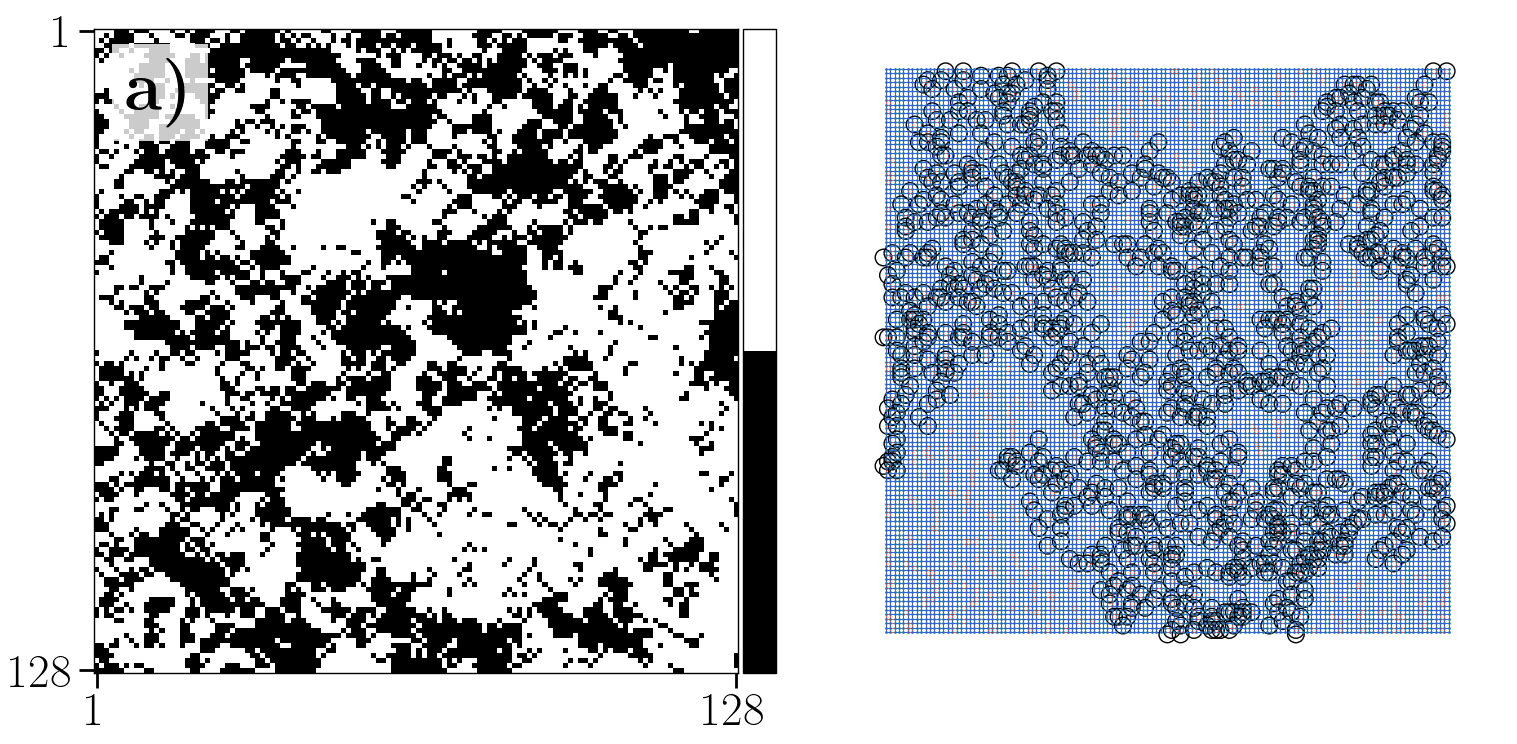

In [176]:
fig, ax = plt.subplots(ncols=2)
#
ax[1].set_aspect('equal')
#
ticks = [0, side-1]
ticksl = [r'$1$', fr'${side}$']
#
arr = flip_to_positive_majority_adapted(l.bin_eigV().reshape(l.syshape))
im = ax[0].imshow(arr, cmap=cmap, origin='upper', interpolation='none')
#
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
ax[0].set_xticklabels(ticksl)
ax[0].set_yticklabels(ticksl)
#
ax[0].text(0.05, 0.9, fr'\textbf{{{ll})}}', transform=ax[0].transAxes, fontsize=50, 
             fontweight='bold', color='black', ha='left', va='center', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=10))
#
divdr, caxm, cbar = imshow_colorbar_caxdivider(im, ax[0])
cbar.set_ticks([])
nx.draw(l.G, pos = l.get_node_pos(), width=0.5,
    edge_color=l.get_edge_color(), ax=ax[1], node_size=1)


if cell == 'rand':
    for i in l.rEdgeFlip['G']:
        if i[0][1] == i[1][1] - 1:
            circle_center = (i[0][0], i[0][1]+.5)
        elif i[0][0] == i[1][0] - 1:
            circle_center = (i[0][0]+.5, i[0][1])
        circle = plt.Circle(circle_center, l.r_c, color='k', fill=False, alpha=1)
        ax[1].add_patch(circle)
elif cell == 'randXERR':
    for circle_center in l.nwDict.rNodeFlip['G']:
        circle = plt.Circle(circle_center, l.r_c, color='red', alpha=0.25)
        ax[1].add_patch(circle)
elif cell == 'randZERR':
    largest_cluster
    l.nwDict.rNodeFlip['G']
    for i in l.nwDict.rNodeFlip['G']:
        circle_center = (i[0]-.5, i[1]-.5)
        circle = plt.Circle(circle_center, l.r_c, color='k', fill=False, alpha=1)
        ax[1].add_patch(circle)
fig.tight_layout()
fig.savefig(f"{datPthDict['defects_plots']}{geo}_{side}_{pflip}_{cell}.pdf", 
    bbox_inches='tight', transparent=True)
# plt.close('all')

In [175]:
import numpy as np
from collections import defaultdict

from scipy.spatial import KDTree


# Assuming circles and radius are defined
circles = np.array(l.nwDict.rNodeFlip['G'])  # Ensure this is an array of tuples
radius = l.r_c

# Create a KDTree for fast range query
tree = KDTree(circles)

# Initialize union-find
uf = UnionFind(len(circles))

# Radius threshold for overlapping
threshold = 2 * radius

# Query KDTree to find pairs of overlapping disks
for i in range(len(circles)):
    neighbors = tree.query_ball_point(circles[i], r=threshold)
    for j in neighbors:
        if i != j:
            uf.union(i, j)

# Extract clusters
clusters = defaultdict(list)
for i in range(len(circles)):
    root = uf.find(i)
    clusters[root].append(tuple(circles[i]))

# Find the largest cluster
largest_cluster = max(clusters.values(), key=len)

# Print the largest cluster
print("Largest cluster size:", len(largest_cluster))
print("Positions of circles in the largest cluster:", largest_cluster)


Largest cluster size: 1246
Positions of circles in the largest cluster: [(28, 115), (92, 23), (76, 43), (35, 99), (63, 45), (59, 6), (120, 77), (42, 86), (106, 114), (57, 20), (87, 87), (126, 111), (22, 83), (116, 24), (55, 23), (49, 104), (115, 48), (103, 52), (60, 32), (17, 101), (123, 33), (112, 106), (126, 94), (81, 21), (7, 72), (112, 19), (33, 30), (99, 108), (47, 109), (68, 68), (79, 60), (111, 54), (50, 54), (67, 92), (26, 95), (126, 99), (70, 75), (115, 41), (76, 39), (106, 120), (55, 88), (43, 40), (95, 14), (25, 86), (59, 26), (115, 37), (58, 9), (116, 67), (75, 72), (125, 58), (12, 99), (89, 58), (55, 30), (118, 24), (4, 76), (39, 60), (55, 63), (89, 21), (92, 12), (70, 93), (122, 85), (10, 86), (87, 27), (2, 76), (102, 114), (68, 10), (6, 100), (18, 89), (27, 37), (47, 97), (83, 56), (53, 102), (23, 116), (70, 83), (54, 50), (18, 125), (46, 39), (26, 67), (6, 86), (56, 14), (97, 66), (125, 108), (110, 45), (72, 95), (70, 40), (17, 79), (26, 37), (18, 127), (78, 96), (82, 5

In [144]:
np.sum(arr)

5202.0

## Other

In [12]:
side = 96
pflip = 0.06
geometry = 'squared'
cell = 'rand'

In [13]:
configurations = [
    (side, True),
    (32, False)
]
#
for i, (side1, pbc) in enumerate(configurations):
    l_tmp = Lattice2D(
        side1=side1,
        geo=geometry,
        pflip=pflip,
        pbc=pbc,
        sgpath=subDatPth,
        with_positions=True,
        initNwDict=True
    )
    #
    fliplist = l_tmp.nwDict[cell]['G']
    l_tmp.flip_sel_edges(fliplist)
    l_tmp.compute_k_eigvV()
    #
    if i == 0:
        l = l_tmp
    elif i == 1:
        l_draw = l_tmp

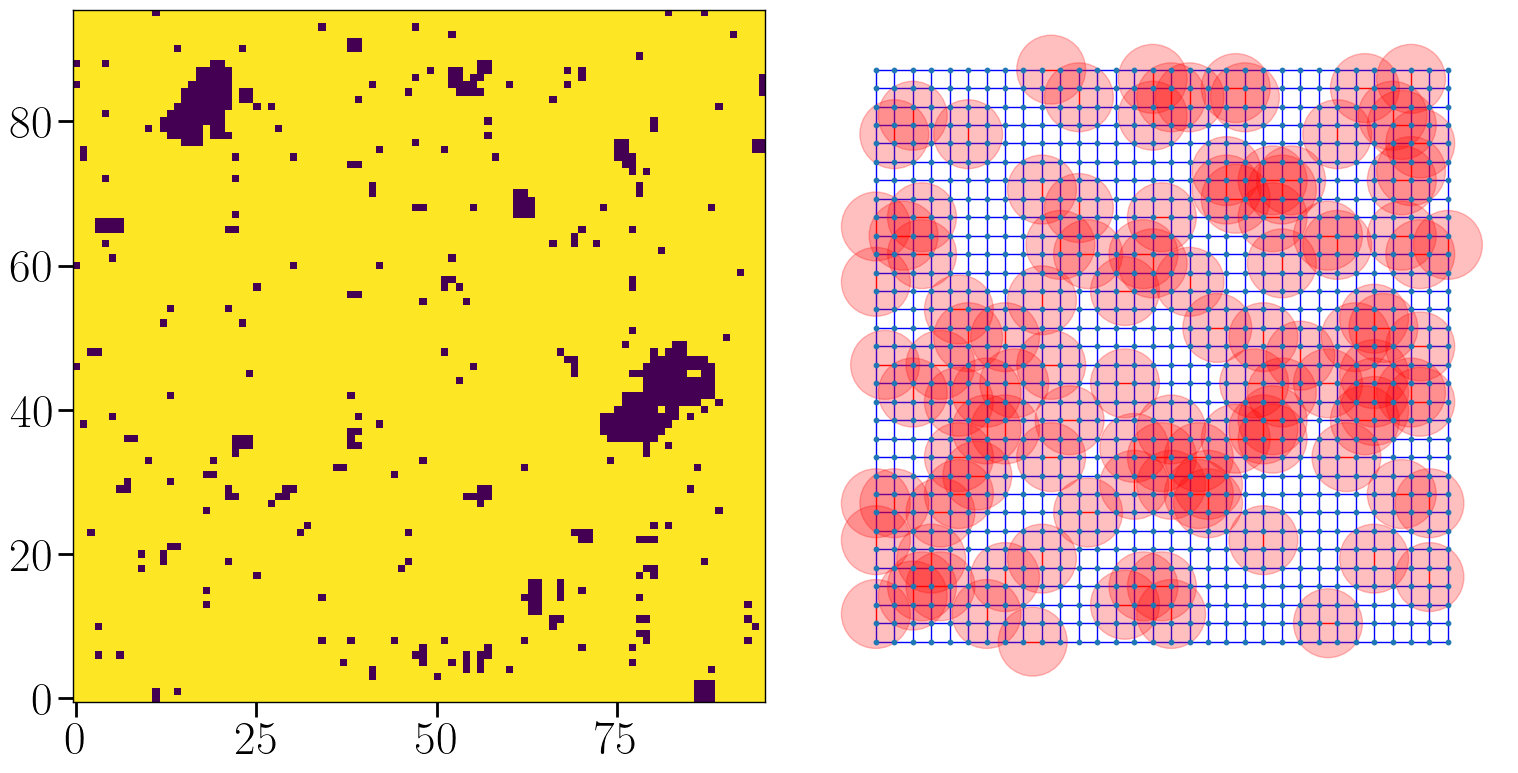

In [14]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(np.sign(l.eigV[0].reshape(l.syshape)))
nx.draw(l_draw.G, pos = l_draw.get_node_pos(), 
    edge_color=l_draw.get_edge_color(), ax=ax[1], node_size=10)
ax[1].set_aspect('equal')
if cell == 'rand':
    for i in l_draw.rEdgeFlip['G']:
        if i[0][1] == i[1][1] - 1:
            circle_center = (i[0][0], i[0][1]+.5)
        elif i[0][0] == i[1][0] - 1:
            circle_center = (i[0][0]+.5, i[0][1])
        circle = plt.Circle(circle_center, l_draw.r_c, color='red', alpha=0.25)
        ax[1].add_patch(circle)
elif cell == 'randXERR':
    for circle_center in l_draw.nwDict.rNodeFlip['G']:
        circle = plt.Circle(circle_center, l_draw.r_c, color='red', alpha=0.25)
        ax[1].add_patch(circle)
elif cell == 'randZERR':
    for i in l_draw.nwDict.rNodeFlip['G']:
        circle_center = (i[0]-.5, i[1]-.5)
        circle = plt.Circle(circle_center, l_draw.r_c, color='red', alpha=0.25)
        ax[1].add_patch(circle)
fig.tight_layout()
fig.savefig(f"{datPthDict['defects_plots']}{geometry}_{side}_{pflip}_{cell}.pdf", 
    bbox_inches='tight', transparent=True)
# plt.close('all')

In [ ]:
rows, cols= 64, 64
p = 0.1
random_matrix = np.random.rand(rows*cols)
binary_matrix = np.where(random_matrix < p, 1, -1)


In [ ]:
rows, cols= 128, 128
pinf = []
for p in np.linspace(0.1, 0.9, 50):
    random_matrix = np.random.rand(rows, cols)
    binary_matrix = np.where(random_matrix < p, 1, -1)
    pinf.append(np.abs(np.where(binary_matrix.flatten() == 1)[0].shape[0] / (rows*cols) - np.where(binary_matrix.flatten() == -1)[0].shape[0] / (rows*cols)))

In [ ]:
plt.plot(np.linspace(0.1, 0.9, 50), pinf)

In [ ]:
plt.imshow(binary_matrix)

In [ ]:
l = Lattice2D(64)
nx.set_node_attributes(l.G, values=random.choices([-1, 1], k=l.G.number_of_nodes()))

In [ ]:
l = Lattice2D(2048, pflip=0.001, with_positions=False)
l.flip_sel_edges(l.nwDict['rand']['G'])

In [ ]:
l.compute_k_eigvV()